In [7]:
pip install yfinance

  Using cached yfinance-0.2.14-py2.py3-none-any.whl (59 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.3 MB/s eta 0:00:0000:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 8.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 5.6 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.9 MB/s eta 

In [10]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as pyplot


In [12]:
stocks = yf.download(['MSFT','TSLA'], start="2018-01-01", end="2023-04-01")
stocksData=stocks.loc[:, "Close"].copy()
stocksData.head(5)

[*********************100%***********************]  2 of 2 completed


,MSFT,TSLA
Date,,
2018-01-02,85.949997,21.368668
2018-01-03,86.349998,21.150000
2018-01-04,87.110001,20.974667
2018-01-05,88.190002,21.105333
2018-01-08,88.279999,22.427334


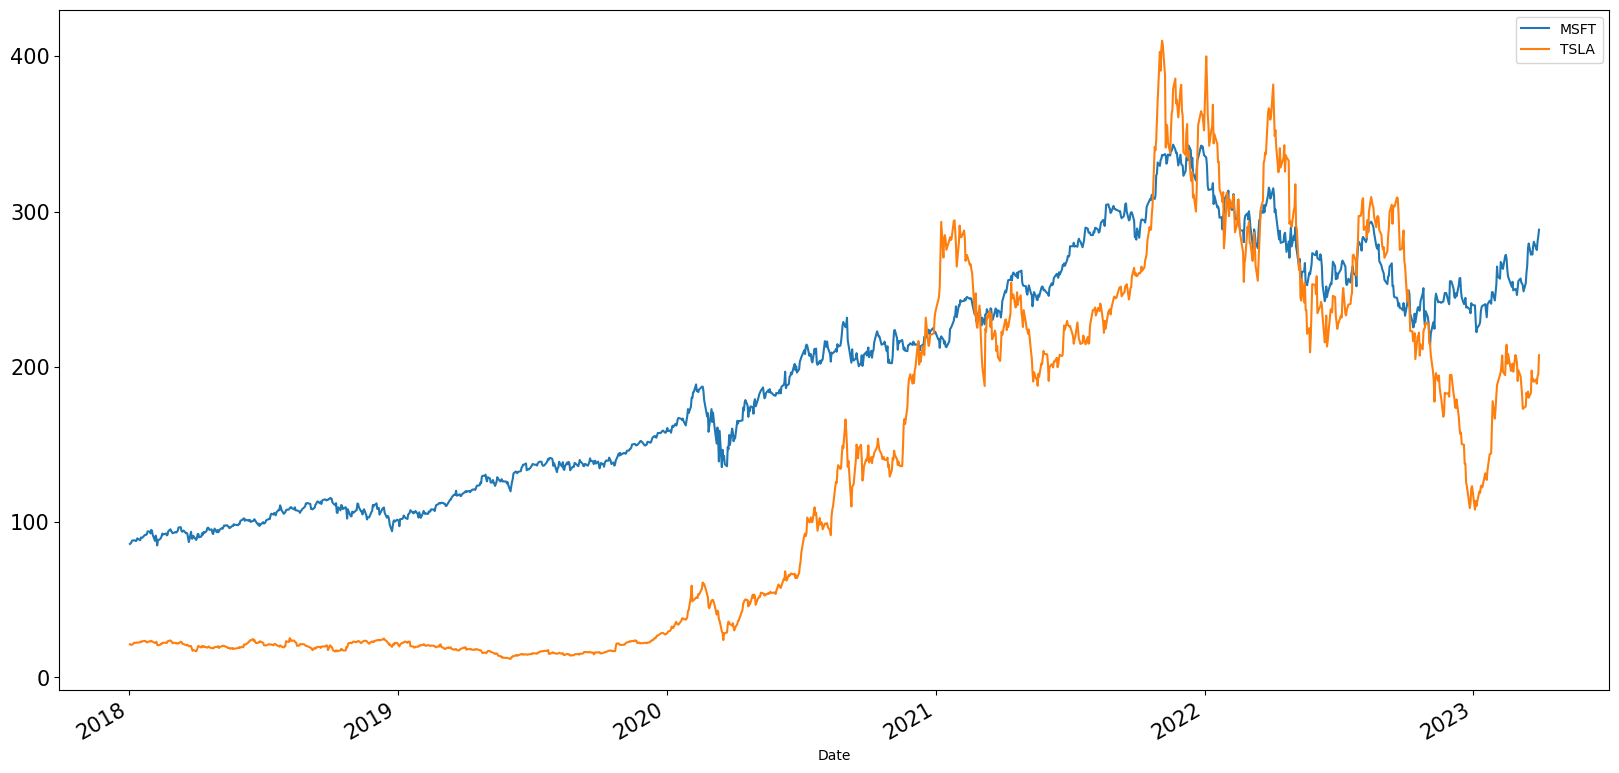

In [13]:
stocksData.plot(figsize= (20,10), fontsize=15 )
pyplot.style.use("classic")
pyplot.show()

In [14]:
stocksData.pct_change()

,MSFT,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.004654,-0.010233
2018-01-04,0.008801,-0.008290
2018-01-05,0.012398,0.006230
2018-01-08,0.001020,0.062638
...,...,...
2023-03-27,-0.014934,0.007353
2023-03-28,-0.004161,-0.013659
2023-03-29,0.019184,0.024790


In [15]:
data = stocksData.pct_change().dropna()
data

,MSFT,TSLA
Date,,
2018-01-03,0.004654,-0.010233
2018-01-04,0.008801,-0.008290
2018-01-05,0.012398,0.006230
2018-01-08,0.001020,0.062638
2018-01-09,-0.000680,-0.008085
...,...,...
2023-03-27,-0.014934,0.007353
2023-03-28,-0.004161,-0.013659
2023-03-29,0.019184,0.024790


In [20]:
data = data.describe().T.loc[:,["mean","std"]]
data

,mean,std
mean,0.012201,0.005594
std,0.015217,0.007107


In [25]:
data["mean"]=data["mean"] * 251
data["std"]= data["std"] * np.sqrt(251)
data

,mean,std
mean,768.648649,1.404157
std,958.660145,1.783976


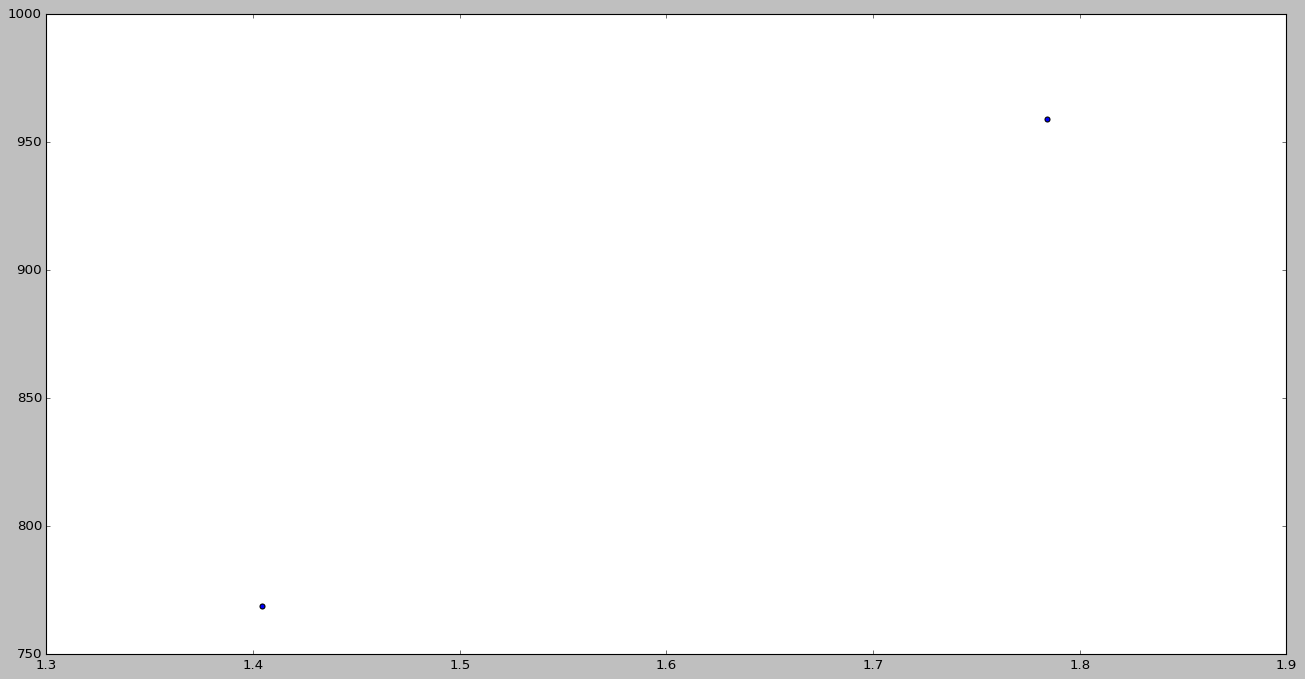

In [37]:
fig, ax = pyplot.subplots(figsize=(20, 10))
ax.scatter(x=data["std"], y=data["mean"], label=data.index)

for idx in data.index:
    if idx == 'MSFT':
        label = 'MSFT'
    elif idx == 'TSLA':
        label = 'TSLA'
    ax.annotate(label, xy=(data.loc[idx, "std"] + 0.005, data.loc[idx, "mean"] + 0.005))





As the mean and standard deviation is very high for Tesla as compared to Microsoft, investing in Tesla is comparitively risky.